## Hastalık Tanımı
Diyabet, hastalarda bazı göz bozukluklarına zemin hazırlar. Örneğin göz tansiyonu (glokom) ve katarakt (göz merceğinin bulanıklaşması) şeker hastalarında normalden iki kat fazla görülmektedir. Fakat en önemli göz bozukluğu diyabete bağlı retinopati’dir. Diyabete bağlı retinopati (Diyabetik retinopati = Kısaca DR), tüm dünyada görme kaybı yapan nedenlerin başında gelmektedir. 
 
Normal (N)(Normal),

Diabetes (D)(Diyabet),

Glaucoma (G)(Glokom ),

Cataract (C)(Katarakt)

"N":0,"C":1,"D":2,"G":3


## Google Colab Kimlik Doğrulama Adımı

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Kütüphanelerin kullanılmak üzere içeri aktarılması

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
from collections import Counter

import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,AveragePooling2D
from keras.layers import Input, Add,Activation, BatchNormalization
from tensorflow.keras.utils import plot_model

# Verinin Yüklenmesi

In [3]:
filepath = r"/gdrive/My Drive/Bitirme_2/OnIslenmisDataSetleri_2/"

def data_load(method_name):
  global filepath
  
  X_train_oversampling = np.load(filepath+"X_train_{}.npy".format(method_name))
  y_train_oversampling= np.load(filepath+"y_train_{}.npy".format(method_name))
  
  X_test = np.load(filepath+"X_test.npy")
  y_test = np.load(filepath+"y_test.npy")

  return X_train_oversampling,y_train_oversampling,X_test,y_test


In [4]:
X_train_oversampling,y_train_oversampling,X_test,y_test = data_load("normal")

In [5]:
print(X_train_oversampling.shape)
print(y_train_oversampling.shape)

print(X_test.shape)
print(y_test.shape)

(2135, 224, 224, 3)
(2135, 4)
(534, 224, 224, 3)
(534, 4)


In [16]:
y_test[0]

array([1., 0., 0., 0.], dtype=float32)

In [18]:
y_train_oversampling[0]

array([1., 0., 0., 0.], dtype=float32)

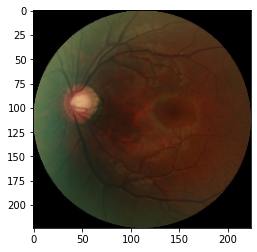

In [6]:
import matplotlib.pyplot as plt
image=X_train_oversampling[1]
plt.imshow(image)
plt.show()

In [7]:
y_train_oversampling

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [8]:
class_size = 4

# MODEL OLUŞTURMA

In [ ]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import import_ipynb

In [ ]:
os.chdir("/gdrive/My Drive/Bitirme_2/")

In [ ]:
!ls

1.normal_VeriOnIsleme_DiyabeteBagliGözHastaliklariTespiti.ipynb
2_adasyn_DiyabeteBagliGözHastaliklariTespiti.ipynb
DiyabetTahminModelleri.ipynb
EgitilmisModeller_2
GetModel.ipynb
ModelGecmisleri_2
OnIslenmisDataSetleri_2


In [ ]:
from GetModel import *

importing Jupyter notebook from GetModel.ipynb


In [ ]:
# ---- Alexnet -----
def get_Alexnet_model():
    global class_size
    return AlexNet(class_size)

def get_Alexnet_model2():
    global class_size
    return AlexNet2(class_size)
"""
# ---- ResNet50 -----

def get_ResNet50_model3():
  global class_size
  return ResNet50_model3(class_size)

# ----- VGG16 ------

def get_VGG16():
  global class_size
  return VGG16(class_size)
"""

'\n# ---- ResNet50 -----\n\ndef get_ResNet50_model3():\n  global class_size\n  return ResNet50_model3(class_size)\n\n# ----- VGG16 ------\n\ndef get_VGG16():\n  global class_size\n  return VGG16(class_size)\n'

# Eğitilen Modelin Kaydedilmesi ve Geri Yüklenmesi

In [9]:
import keras

In [10]:
def model_save(model,model_name):
    filepath = r"/gdrive/My Drive/Bitirme_2/EgitilmisModeller_2/{}.h5".format(model_name)
    model.save(filepath) 

def model_load(model_name):
  filepath = r"/gdrive/My Drive/Bitirme_2/EgitilmisModeller_2/{}.h5".format(model_name)
  return keras.models.load_model(filepath)

# Model eğitim geçmişindeki (acc-loss) değerlerini grafik ile çizdirilmesi

In [11]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns  #Seaborn, güzel görünen ve bilgilendirici istatistiksel grafikler çizmek için üst düzey bir arayüz sağlar.

def history_summary(hist):
    sns.set() #default 
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history['val_accuracy'])
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.show()

# Model eğitim geçmişinin csv olarak kaydedilmesi ve geri yüklenmesi

In [12]:
import pandas as pd
# histroy nin kaydedilmesi
def history_save(history_name,history):
  name = "/gdrive/My Drive/Bitirme_2/ModelGecmisleri_2/{}".format(history_name)
  hist_df = pd.DataFrame(history.history) 
  hist_df.to_csv(name+'.csv',index = False)
  
def history_load(history_name):
  history=pd.read_csv("/gdrive/My Drive/Bitirme_2/ModelGecmisleri_2/{}.csv".format(history_name))
  return history


# Eğitilen Modelin test verisi için classification_report  ve confusion_matrix in çizdirilmesi


In [39]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_and_classification_report(model):
  global X_test,y_test
  y_pred = model.predict(X_test, verbose=1)
  y_pred = np.argmax(y_pred, axis=1)
  target_names = ['Normal','Katarakt','D.Retinopati','Glokom']
  print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

  cf_matrix = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
  print(cf_matrix,"\n")
  ax = sns.heatmap(cf_matrix, annot=True,fmt="d", cmap='Blues')
  ax.set_title('Confusion Matrix');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actal Values');
  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(target_names)
  ax.yaxis.set_ticklabels(target_names)
  ## Display the visualization of the Confusion Matrix.
  plt.show()


In [ ]:
"""from sklearn.metrics import classification_report, confusion_matrix

def confusion_matrix_and_classification_report(model):
  global X_test,y_test
  y_pred = model.predict(X_test, verbose=1)
  y_pred = np.argmax(y_pred, axis=1)
  target_names = ['Normal','cataract','retinopathy',"glaucoma"]
  print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

  cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
  cm_df = pd.DataFrame(cm,index = target_names,columns = target_names)
#Plotting the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()"""


# YSA Modelinin Derlenmesi ve Eğitilmesi

optimizer: ağırlık katsayılarının güncellenmesi için kullanılacak optimizasyon yöntemi

loss ; başarıya giderken geriye giderken hesaplama için

metrics başarı metriği olarak accuracy kullanıldı

In [14]:
from tensorflow.keras import optimizers

## AlexNet modellinin farklı parametrelerle eğitilmesi

### 1- AlexNet - SGD

In [ ]:
alexnet_1 = get_Alexnet_model2()
# categorical_crossentropy 
alexnet_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

alexNet_1_history = alexnet_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
54/54 [==============================] - 16s 57ms/step - loss: 1.2277 - accuracy: 0.4555 - val_loss: 1.3459 - val_accuracy: 0.4848
Epoch 2/20
54/54 [==============================] - 2s 34ms/step - loss: 1.1162 - accuracy: 0.5281 - val_loss: 1.3170 - val_accuracy: 0.4848
Epoch 3/20
54/54 [==============================] - 2s 35ms/step - loss: 1.0893 - accuracy: 0.5463 - val_loss: 1.2904 - val_accuracy: 0.4684
Epoch 4/20
54/54 [==============================] - 2s 35ms/step - loss: 1.0385 - accuracy: 0.5855 - val_loss: 1.2610 - val_accuracy: 0.3700
Epoch 5/20
54/54 [==============================] - 2s 35ms/step - loss: 1.0148 - accuracy: 0.6007 - val_loss: 1.2888 - val_accuracy: 0.2319
Epoch 6/20
54/54 [==============================] - 2s 35ms/step - loss: 0.9959 - accuracy: 0.6095 - val_loss: 1.3404 - val_accuracy: 0.2342
Epoch 7/20
54/54 [==============================] - 2s 36ms/step - loss: 0.9700 - accuracy: 0.6241 - val_loss: 1.4947 - val_accuracy: 0.2319
Epoch 8/20
5

In [ ]:
# Değerlendirme
loss_1,accuracy_1 = alexnet_1.evaluate(X_test,y_test)

17/17 [==============================] - 1s 41ms/step - loss: 0.8856 - accuracy: 0.6236


In [ ]:
history_save("alexNet_1_history",alexNet_1_history)
model_save(alexnet_1,"alexnet_1_224_224_3")

17/17 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.69      0.65      0.67       264
    Katarakt       0.57      0.95      0.71       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.56      0.35      0.43       115

    accuracy                           0.62       534
   macro avg       0.46      0.49      0.45       534
weighted avg       0.60      0.62      0.59       534

[[171  65   0  28]
 [  4 122   0   2]
 [ 22   4   0   1]
 [ 52  23   0  40]] 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


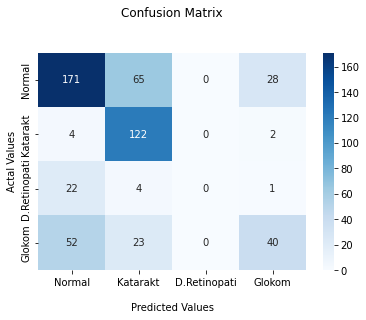

In [28]:
alexnet_1 = model_load("alexnet_1_224_224_3")
confusion_matrix_and_classification_report(alexnet_1)

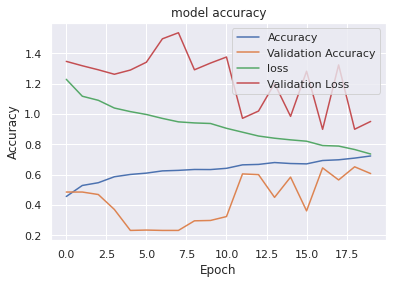

In [ ]:
history_summary(alexNet_1_history)

In [ ]:
h=history_load("alexNet_1_history")

In [ ]:
h.head()

,loss,accuracy,val_loss,val_accuracy
0,1.227696,0.455504,1.345889,0.484778
1,1.116214,0.528103,1.317003,0.484778
2,1.089305,0.546253,1.290412,0.468384
3,1.038481,0.585480,1.261043,0.370023
4,1.014847,0.600703,1.288767,0.231850


### 2 - AlexNet - rmsprop

In [ ]:
alexnet_2 = get_Alexnet_model2()

alexnet_2.compile(optimizer = optimizers.RMSprop(),#learning_rate=0.001
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

alexNet_2_history = alexnet_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 4s 48ms/step - loss: 4.1360 - accuracy: 0.4666 - val_loss: 1.2191 - val_accuracy: 0.4848
Epoch 2/20
54/54 [==============================] - 2s 40ms/step - loss: 1.2815 - accuracy: 0.4959 - val_loss: 1.1993 - val_accuracy: 0.4848
Epoch 3/20
54/54 [==============================] - 2s 40ms/step - loss: 1.2807 - accuracy: 0.4959 - val_loss: 1.2564 - val_accuracy: 0.4848
Epoch 4/20
54/54 [==============================] - 2s 40ms/step - loss: 1.2266 - accuracy: 0.5105 - val_loss: 1.2157 - val_accuracy: 0.4848
Epoch 5/20
54/54 [==============================] - 2s 40ms/step - loss: 1.2152 - accuracy: 0.5047 - val_loss: 1.2185 - val_accuracy: 0.4848
Epoch 6/20
54/54 [==============================] - 2s 40ms/step - loss: 1.1641 - accuracy: 0.5199 - val_loss: 1.1431 - val_accuracy: 0.5152
Epoch 7/20
54/54 [==============================] - 2s 42ms/step - loss: 1.1701 - accuracy: 0.5205 - val_loss: 1.5645 - val_accuracy: 0.3349
Epoch 8/20
54

In [ ]:
loss_2,accuracy_2 = alexnet_2.evaluate(X_test,y_test)

17/17 [==============================] - 0s 20ms/step - loss: 1.8164 - accuracy: 0.5019


In [ ]:
history_save("alexNet_2_history",alexNet_2_history)
model_save(alexnet_2,"alexnet_2_224_224_3")

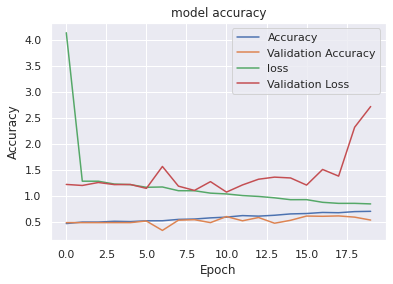

In [ ]:
history_summary(alexNet_2_history)

17/17 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.52      0.74      0.61       264
    Katarakt       0.90      0.15      0.26       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.39      0.47      0.43       115

    accuracy                           0.50       534
   macro avg       0.45      0.34      0.32       534
weighted avg       0.56      0.50      0.45       534

[[195   2   0  67]
 [ 99  19   0  10]
 [ 20   0   0   7]
 [ 61   0   0  54]] 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


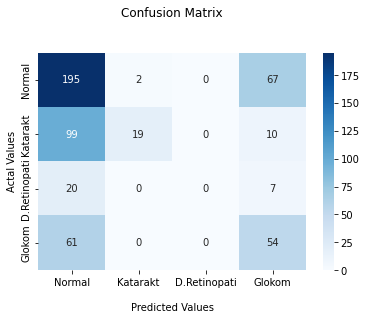

In [29]:
alexnet_2 = model_load("alexnet_2_224_224_3")
confusion_matrix_and_classification_report(alexnet_2)

### 3 - AlexNet - Adam

In [ ]:
alexnet_3 = get_Alexnet_model2()

alexnet_3.compile(optimizer = optimizers.Adam(),#learning_rate=0.001
                loss='categorical_crossentropy',
                metrics=['accuracy'])

alexNet_3_history = alexnet_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 3s 43ms/step - loss: 1.3416 - accuracy: 0.4783 - val_loss: 1.2106 - val_accuracy: 0.4848
Epoch 2/20
54/54 [==============================] - 2s 36ms/step - loss: 1.1674 - accuracy: 0.5047 - val_loss: 1.2858 - val_accuracy: 0.4871
Epoch 3/20
54/54 [==============================] - 2s 36ms/step - loss: 1.1469 - accuracy: 0.5263 - val_loss: 1.3202 - val_accuracy: 0.4496
Epoch 4/20
54/54 [==============================] - 2s 36ms/step - loss: 1.1392 - accuracy: 0.5141 - val_loss: 1.1047 - val_accuracy: 0.5129
Epoch 5/20
54/54 [==============================] - 2s 36ms/step - loss: 1.0886 - accuracy: 0.5322 - val_loss: 1.2964 - val_accuracy: 0.5082
Epoch 6/20
54/54 [==============================] - 2s 36ms/step - loss: 1.0693 - accuracy: 0.5515 - val_loss: 1.1601 - val_accuracy: 0.4192
Epoch 7/20
54/54 [==============================] - 2s 36ms/step - loss: 1.0707 - accuracy: 0.5644 - val_loss: 1.2062 - val_accuracy: 0.4824
Epoch 8/20
54

In [ ]:
loss_3,accuracy_3 = alexnet_3.evaluate(X_test,y_test)

17/17 [==============================] - 0s 16ms/step - loss: 1.0938 - accuracy: 0.5431


In [ ]:
history_save("alexNet_3_history",alexNet_3_history)
model_save(alexnet_3,"alexnet_3_224_224_3")

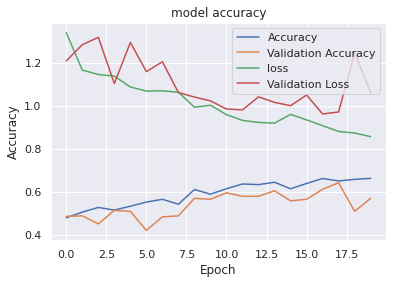

In [ ]:
history_summary(alexNet_3_history)

17/17 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.57      0.66      0.62       264
    Katarakt       0.56      0.58      0.57       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.42      0.36      0.39       115

    accuracy                           0.54       534
   macro avg       0.39      0.40      0.39       534
weighted avg       0.51      0.54      0.52       534

[[175  41   1  47]
 [ 52  74   0   2]
 [ 18   2   0   7]
 [ 60  14   0  41]] 




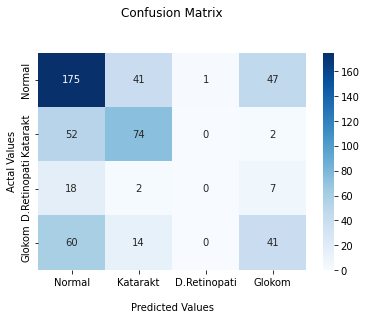

In [30]:
alexnet_3 = model_load("alexnet_3_224_224_3")
confusion_matrix_and_classification_report(alexnet_3)

### 4 - AlexNet - Adadelta

In [ ]:
alexnet_5 = get_Alexnet_model2()

alexnet_5.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adadelta(),
              metrics=['accuracy'])

alexNet_5_history = alexnet_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 3s 47ms/step - loss: 1.3568 - accuracy: 0.3290 - val_loss: 1.3773 - val_accuracy: 0.4848
Epoch 2/20
54/54 [==============================] - 2s 37ms/step - loss: 1.2650 - accuracy: 0.4871 - val_loss: 1.3544 - val_accuracy: 0.4848
Epoch 3/20
54/54 [==============================] - 2s 40ms/step - loss: 1.2063 - accuracy: 0.5141 - val_loss: 1.3241 - val_accuracy: 0.4848
Epoch 4/20
54/54 [==============================] - 2s 40ms/step - loss: 1.1694 - accuracy: 0.5141 - val_loss: 1.2938 - val_accuracy: 0.4848
Epoch 5/20
54/54 [==============================] - 2s 38ms/step - loss: 1.1492 - accuracy: 0.5117 - val_loss: 1.2660 - val_accuracy: 0.4848
Epoch 6/20
54/54 [==============================] - 2s 37ms/step - loss: 1.1337 - accuracy: 0.5100 - val_loss: 1.2425 - val_accuracy: 0.4848
Epoch 7/20
54/54 [==============================] - 2s 38ms/step - loss: 1.1269 - accuracy: 0.5141 - val_loss: 1.2214 - val_accuracy: 0.4848
Epoch 8/20
54

In [ ]:
loss_5,accuracy_5 = alexnet_5.evaluate(X_test,y_test)

17/17 [==============================] - 0s 20ms/step - loss: 1.0385 - accuracy: 0.5618


In [ ]:
history_save("alexNet_5_history",alexNet_5_history)
model_save(alexnet_5,"alexnet_5_224_224_3")

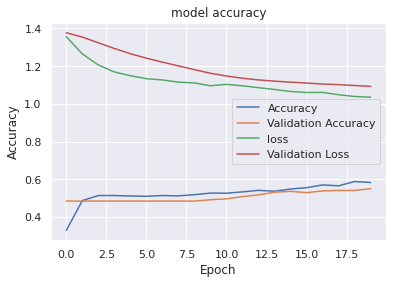

In [ ]:
history_summary(alexNet_5_history)

17/17 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.56      0.87      0.68       264
    Katarakt       0.78      0.35      0.48       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.38      0.23      0.28       115

    accuracy                           0.56       534
   macro avg       0.43      0.36      0.36       534
weighted avg       0.55      0.56      0.51       534

[[229   8   0  27]
 [ 68  45   0  15]
 [ 27   0   0   0]
 [ 84   5   0  26]] 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


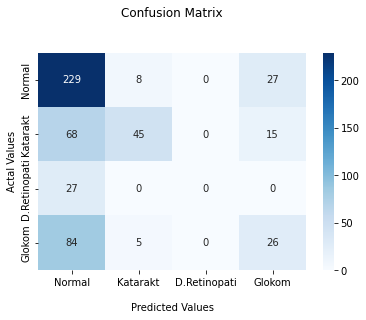

In [31]:
alexnet_5 = model_load("alexnet_5_224_224_3")
confusion_matrix_and_classification_report(alexnet_5)

### 5 - AlexNet - Adagrad

In [ ]:
alexnet_6 = get_Alexnet_model2()

alexnet_6.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adagrad(),
              metrics=['accuracy'])

alexNet_6_history = alexnet_6.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20 ,
                                  validation_split=0.20)

Epoch 1/20
54/54 [==============================] - 3s 44ms/step - loss: 1.2049 - accuracy: 0.4953 - val_loss: 1.3501 - val_accuracy: 0.4848
Epoch 2/20
54/54 [==============================] - 2s 36ms/step - loss: 1.1345 - accuracy: 0.5170 - val_loss: 1.3207 - val_accuracy: 0.4848
Epoch 3/20
54/54 [==============================] - 2s 37ms/step - loss: 1.0995 - accuracy: 0.5340 - val_loss: 1.2983 - val_accuracy: 0.5035
Epoch 4/20
54/54 [==============================] - 2s 45ms/step - loss: 1.0612 - accuracy: 0.5580 - val_loss: 1.2856 - val_accuracy: 0.2623
Epoch 5/20
54/54 [==============================] - 3s 47ms/step - loss: 1.0287 - accuracy: 0.5884 - val_loss: 1.2721 - val_accuracy: 0.2646
Epoch 6/20
54/54 [==============================] - 2s 45ms/step - loss: 0.9878 - accuracy: 0.6118 - val_loss: 1.4221 - val_accuracy: 0.2319
Epoch 7/20
54/54 [==============================] - 2s 40ms/step - loss: 0.9712 - accuracy: 0.6206 - val_loss: 1.3835 - val_accuracy: 0.2389
Epoch 8/20
54

In [ ]:
loss_6,accuracy_6 = alexnet_6.evaluate(X_test,y_test)

17/17 [==============================] - 0s 20ms/step - loss: 1.3484 - accuracy: 0.5431


In [ ]:
history_save("alexNet_6_history",alexNet_6_history)
model_save(alexnet_6,"alexnet_6_224_224_3")

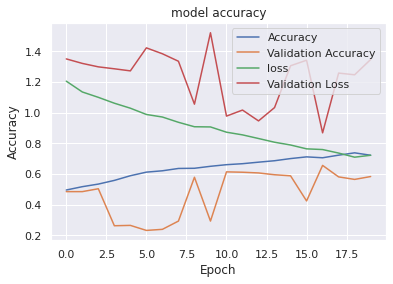

In [ ]:
history_summary(alexNet_6_history)

17/17 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

      Normal       0.54      0.87      0.66       264
    Katarakt       0.92      0.18      0.30       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.47      0.33      0.39       115

    accuracy                           0.54       534
   macro avg       0.48      0.34      0.34       534
weighted avg       0.59      0.54      0.48       534

[[229   1   0  34]
 [ 96  23   0   9]
 [ 27   0   0   0]
 [ 76   1   0  38]] 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


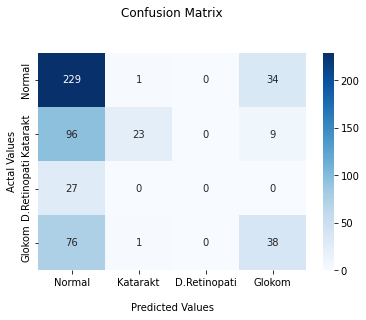

In [32]:
alexnet_6 = model_load("alexnet_6_224_224_3")
confusion_matrix_and_classification_report(alexnet_6)

## ResNet50  modellinin farklı parametrelerle eğitilmesi

224,224,3

In [ ]:
from tensorflow.keras.applications import ResNet50
def resnet50():
  global class_size
  base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
  for layer in base_model.layers:
    layer.trainable = False
  
  model = Sequential()
  model.add(base_model)
  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(class_size, activation='softmax'))
  return model

###1 - ResNet50 - SGD



In [ ]:
resnet_1 = resnet50()

resnet_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

resnet_1_history = resnet_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

94781440/94765736 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
54/54 [==============================] - 23s 165ms/step - loss: 1.8401 - accuracy: 0.4543 - val_loss: 1.2578 - val_accuracy: 0.4848
Epoch 2/20
54/54 [==============================] - 7s 127ms/step - loss: 1.1955 - accuracy: 0.5088 - val_loss: 1.2101 - val_accuracy: 0.4848
Epoch 3/20
54/54 [==============================] - 7s 136ms/step - loss: 1.1788 - accuracy: 0.5117 - val_loss: 1.1821 - val_accuracy: 0.4941
Epoch 4/20
54/54 [==============================] - 7s 139ms/step - loss: 1.1777 - accuracy: 0.5158 - val_loss: 1.1770 - val_accuracy: 0.4941
Epoch 5/20
54/54 [==============================] - 7s 129ms/step - loss: 1.1700 - accuracy: 0.5141 - val_loss: 1.1726 - val_accuracy: 0.4871
Epoch 6/20
54/54 [==============================] - 7s 129ms/step - loss: 1.1624 - accuracy: 0.5193 - val_loss: 1.1649 - val_accuracy: 0.4918
Epoch 7/20
54/54 [==============================] - 7s 129ms/step - loss: 1.1669 - accuracy: 0.5158 - val_loss: 1.1667 - val_accuracy: 0.4918
Epoch

In [ ]:
loss_7,accuracy_7 = resnet_1.evaluate(X_test,y_test)

17/17 [==============================] - 2s 131ms/step - loss: 1.1622 - accuracy: 0.5056


In [ ]:
history_save("resnet_1_history",resnet_1_history)
model_save(resnet_1,"resnet_1_224_224_3")

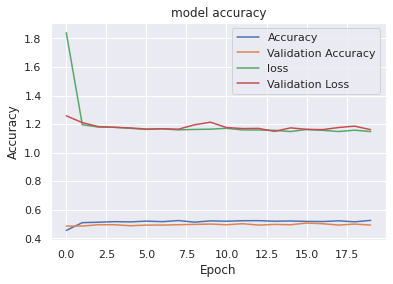

In [ ]:
history_summary(resnet_1_history)

17/17 [==============================] - 4s 129ms/step
              precision    recall  f1-score   support

      Normal       0.50      0.99      0.66       264
    Katarakt       0.80      0.06      0.12       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.51       534
   macro avg       0.33      0.26      0.20       534
weighted avg       0.44      0.51      0.36       534

[[262   2   0   0]
 [120   8   0   0]
 [ 27   0   0   0]
 [115   0   0   0]] 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


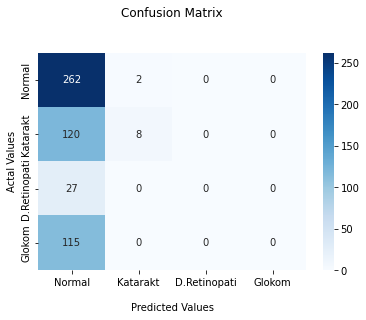

In [33]:
resnet_1 = model_load("resnet_1_224_224_3")
confusion_matrix_and_classification_report(resnet_1)

###2 - ResNet50 - rmsprop

In [ ]:
resnet_2 = resnet50()

resnet_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

resnet_2_history = resnet_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
54/54 [==============================] - 12s 173ms/step - loss: 35.2685 - accuracy: 0.3753 - val_loss: 17.0336 - val_accuracy: 0.2342
Epoch 2/20
54/54 [==============================] - 8s 155ms/step - loss: 15.2916 - accuracy: 0.3788 - val_loss: 2.7836 - val_accuracy: 0.4684
Epoch 3/20
54/54 [==============================] - 8s 155ms/step - loss: 8.8886 - accuracy: 0.3618 - val_loss: 10.3664 - val_accuracy: 0.2319
Epoch 4/20
54/54 [==============================] - 8s 155ms/step - loss: 5.6741 - accuracy: 0.3940 - val_loss: 5.1210 - val_accuracy: 0.4941
Epoch 5/20
54/54 [==============================] - 8s 157ms/step - loss: 4.2988 - accuracy: 0.3975 - val_loss: 2.9792 - val_accuracy: 0.5012
Epoch 6/20
54/54 [==============================] - 8s 157ms/step - loss: 3.5481 - accuracy: 0.3776 - val_loss: 1.8951 - val_accuracy: 0.3396
Epoch 7/20
54/54 [==============================] - 8s 157ms/step - loss: 2.6727 - accuracy: 0.3847 - val_loss: 1.7231 - val_accuracy: 0.0937
E

In [ ]:
loss_8,accuracy_8 = resnet_2.evaluate(X_test,y_test)

17/17 [==============================] - 2s 99ms/step - loss: 1.4338 - accuracy: 0.2453


In [ ]:
history_save("resnet_2_history",resnet_2_history)
model_save(resnet_2,"resnet_2_224_224_3")

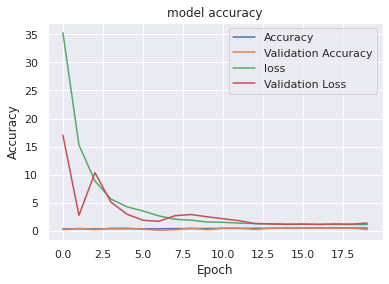

In [ ]:
history_summary(resnet_2_history)

17/17 [==============================] - 2s 97ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.44      0.03      0.06       264
    Katarakt       0.69      0.09      0.15       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.22      0.97      0.36       115

    accuracy                           0.25       534
   macro avg       0.34      0.27      0.14       534
weighted avg       0.43      0.25      0.14       534

[[  8   3   0 253]
 [  6  11   0 111]
 [  2   1   0  24]
 [  2   1   0 112]] 




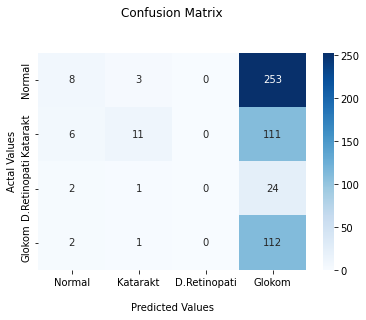

In [34]:
resnet_2 = model_load("resnet_2_224_224_3")
confusion_matrix_and_classification_report(resnet_2)

###3 - ResNet50 - adam

In [ ]:
resnet_3 = resnet50()

resnet_3.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

resnet_3_history = resnet_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
54/54 [==============================] - 11s 154ms/step - loss: 11.6182 - accuracy: 0.3882 - val_loss: 5.0121 - val_accuracy: 0.4941
Epoch 2/20
54/54 [==============================] - 7s 136ms/step - loss: 3.8893 - accuracy: 0.4169 - val_loss: 2.5288 - val_accuracy: 0.4848
Epoch 3/20
54/54 [==============================] - 7s 136ms/step - loss: 2.9271 - accuracy: 0.4005 - val_loss: 2.3774 - val_accuracy: 0.4918
Epoch 4/20
54/54 [==============================] - 7s 136ms/step - loss: 1.8291 - accuracy: 0.4643 - val_loss: 1.3243 - val_accuracy: 0.3888
Epoch 5/20
54/54 [==============================] - 7s 136ms/step - loss: 1.4276 - accuracy: 0.4900 - val_loss: 1.1550 - val_accuracy: 0.5340
Epoch 6/20
54/54 [==============================] - 7s 137ms/step - loss: 1.3598 - accuracy: 0.5029 - val_loss: 1.3839 - val_accuracy: 0.3372
Epoch 7/20
54/54 [==============================] - 7s 137ms/step - loss: 1.1868 - accuracy: 0.5258 - val_loss: 2.0455 - val_accuracy: 0.4988
Epoc

In [ ]:
loss_9,accuracy_9 = resnet_3.evaluate(X_test,y_test)

17/17 [==============================] - 2s 98ms/step - loss: 1.0277 - accuracy: 0.5824


In [ ]:
history_save("resnet_3_history",resnet_3_history)
model_save(resnet_3,"resnet_3_224_224_3")

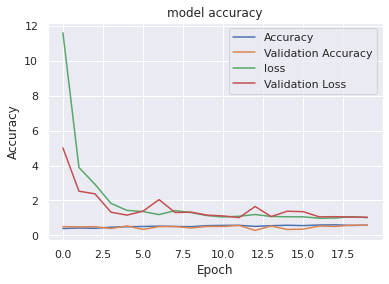

In [ ]:
history_summary(resnet_3_history)

17/17 [==============================] - 2s 98ms/step
              precision    recall  f1-score   support

      Normal       0.58      0.86      0.69       264
    Katarakt       0.57      0.55      0.56       128
D.Retinopati       1.00      0.04      0.07        27
      Glokom       0.87      0.11      0.20       115

    accuracy                           0.58       534
   macro avg       0.75      0.39      0.38       534
weighted avg       0.66      0.58      0.52       534

[[226  36   0   2]
 [ 57  71   0   0]
 [ 23   3   1   0]
 [ 87  15   0  13]] 



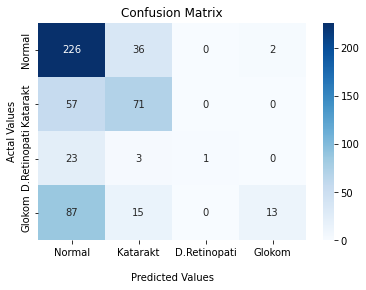

In [40]:
resnet_3 = model_load("resnet_3_224_224_3")
confusion_matrix_and_classification_report(resnet_3)

###4 - ResNet50- Adadelta


In [ ]:
resnet_4 = resnet50()

resnet_4.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adadelta(),
              metrics=['accuracy'])

resnet_4_history = resnet_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
54/54 [==============================] - 11s 159ms/step - loss: 1.3436 - accuracy: 0.4608 - val_loss: 1.1754 - val_accuracy: 0.4871
Epoch 2/20
54/54 [==============================] - 8s 139ms/step - loss: 1.1609 - accuracy: 0.5158 - val_loss: 1.1626 - val_accuracy: 0.4941
Epoch 3/20
54/54 [==============================] - 8s 140ms/step - loss: 1.1507 - accuracy: 0.5164 - val_loss: 1.1624 - val_accuracy: 0.4965
Epoch 4/20
54/54 [==============================] - 8s 140ms/step - loss: 1.1497 - accuracy: 0.5193 - val_loss: 1.1821 - val_accuracy: 0.4941
Epoch 5/20
54/54 [==============================] - 8s 140ms/step - loss: 1.1440 - accuracy: 0.5252 - val_loss: 1.1889 - val_accuracy: 0.4941
Epoch 6/20
54/54 [==============================] - 8s 141ms/step - loss: 1.1416 - accuracy: 0.5258 - val_loss: 1.1515 - val_accuracy: 0.4941
Epoch 7/20
54/54 [==============================] - 8s 141ms/step - loss: 1.1410 - accuracy: 0.5228 - val_loss: 1.1764 - val_accuracy: 0.5293
Epoch

In [ ]:
loss_10,accuracy_10 = resnet_4.evaluate(X_test,y_test)

17/17 [==============================] - 2s 96ms/step - loss: 1.1447 - accuracy: 0.5131


In [ ]:
history_save("resnet_4_history",resnet_4_history)
model_save(resnet_4,"resnet_4_224_224_3")

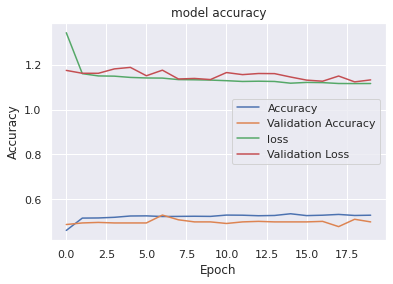

In [ ]:
history_summary(resnet_4_history)

17/17 [==============================] - 2s 99ms/step
              precision    recall  f1-score   support

      Normal       0.51      0.98      0.67       264
    Katarakt       0.57      0.12      0.21       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.51       534
   macro avg       0.27      0.28      0.22       534
weighted avg       0.39      0.51      0.38       534

[[258   6   0   0]
 [112  16   0   0]
 [ 26   1   0   0]
 [110   5   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


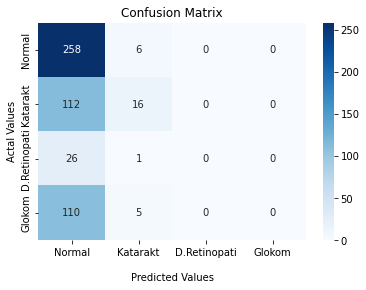

In [41]:
resnet_4 = model_load("resnet_4_224_224_3")
confusion_matrix_and_classification_report(resnet_4)

###5 - ResNet50 - Adagrad

In [ ]:
resnet_5 = resnet50()

resnet_5.compile(optimizer = optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

resnet_5_history = resnet_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.20)

Epoch 1/20
54/54 [==============================] - 11s 152ms/step - loss: 2.4269 - accuracy: 0.4555 - val_loss: 1.3204 - val_accuracy: 0.3021
Epoch 2/20
54/54 [==============================] - 7s 131ms/step - loss: 1.1965 - accuracy: 0.5023 - val_loss: 1.2332 - val_accuracy: 0.2974
Epoch 3/20
54/54 [==============================] - 7s 132ms/step - loss: 1.1945 - accuracy: 0.5105 - val_loss: 1.2480 - val_accuracy: 0.4965
Epoch 4/20
54/54 [==============================] - 7s 131ms/step - loss: 1.1812 - accuracy: 0.5100 - val_loss: 1.1723 - val_accuracy: 0.4965
Epoch 5/20
54/54 [==============================] - 7s 133ms/step - loss: 1.1621 - accuracy: 0.5205 - val_loss: 1.2043 - val_accuracy: 0.4988
Epoch 6/20
54/54 [==============================] - 7s 133ms/step - loss: 1.1654 - accuracy: 0.5240 - val_loss: 1.1793 - val_accuracy: 0.5035
Epoch 7/20
54/54 [==============================] - 7s 133ms/step - loss: 1.1650 - accuracy: 0.5176 - val_loss: 1.1729 - val_accuracy: 0.4941
Epoch

In [ ]:
loss_11,accuracy_11 = resnet_5.evaluate(X_test,y_test)

17/17 [==============================] - 2s 99ms/step - loss: 1.2057 - accuracy: 0.5019


In [ ]:
history_save("resnet_5_history",resnet_5_history)
model_save(resnet_5,"resnet_5_224_224_3")

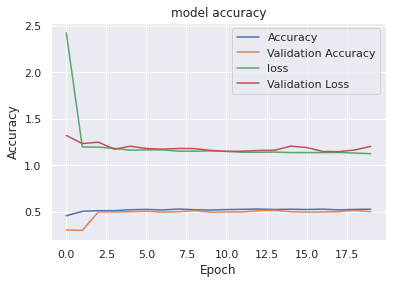

In [ ]:
history_summary(resnet_5_history)

17/17 [==============================] - 2s 100ms/step
              precision    recall  f1-score   support

      Normal       0.50      1.00      0.66       264
    Katarakt       0.83      0.04      0.07       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.50       534
   macro avg       0.33      0.26      0.18       534
weighted avg       0.45      0.50      0.35       534

[[263   1   0   0]
 [123   5   0   0]
 [ 27   0   0   0]
 [115   0   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


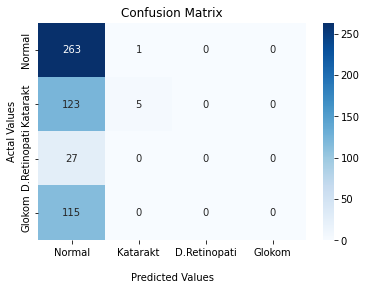

In [42]:
resnet_5 = model_load("resnet_5_224_224_3")
confusion_matrix_and_classification_report(resnet_5)

## VGG16 modellinin farklı parametrelerle eğitilmesi
 224,224,3

In [47]:
from tensorflow.keras.applications.vgg16 import VGG16
def vgg16():
  vgg = VGG16(weights="imagenet",include_top = False,input_shape=(224,224,3))
  global class_size
  for layer in vgg.layers:
    layer.trainable = False

  model = Sequential()
  model.add(vgg)
  model.add(Flatten())
  model.add(Dense(class_size,activation="sigmoid"))

  return model

### 1 - VGG16 - SGD

In [ ]:
vgg16_1 = vgg16()

vgg16_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

vgg16_1_history = vgg16_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)


58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
54/54 [==============================] - 25s 236ms/step - loss: 1.3051 - accuracy: 0.4906 - val_loss: 1.0809 - val_accuracy: 0.5527
Epoch 2/20
54/54 [==============================] - 10s 183ms/step - loss: 1.0112 - accuracy: 0.6112 - val_loss: 1.1390 - val_accuracy: 0.4614
Epoch 3/20
54/54 [==============================] - 10s 185ms/step - loss: 0.9261 - accuracy: 0.6417 - val_loss: 1.7329 - val_accuracy: 0.2904
Epoch 4/20
54/54 [==============================] - 10s 186ms/step - loss: 0.9506 - accuracy: 0.6487 - val_loss: 0.9469 - val_accuracy: 0.6230
Epoch 5/20
54/54 [==============================] - 10s 189ms/step - loss: 0.8662 - accuracy: 0.6657 - val_loss: 0.8497 - val_accuracy: 0.6487
Epoch 6/20
54/54 [==============================] - 10s 192ms/step - loss: 0.8261 - accuracy: 0.6792 - val_loss: 1.4670 - val_accuracy: 0.4918
Epoch 7/20
54/54 [==============================] - 10s 195ms/step - loss: 0.7932 - accuracy: 0.6856 - val_loss: 0.8402 - val_accuracy: 0.6932

In [ ]:
loss_12,accuracy_12 = vgg16_1.evaluate(X_test,y_test)

17/17 [==============================] - 5s 292ms/step - loss: 0.8347 - accuracy: 0.6929


In [ ]:
history_save("vgg16_1_history",vgg16_1_history)
model_save(vgg16_1,"vgg16_1_224_224_3")

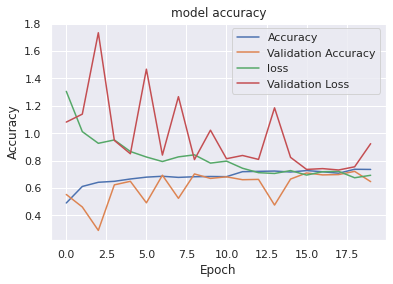

In [ ]:
history_summary(vgg16_1_history)

17/17 [==============================] - 7s 279ms/step
              precision    recall  f1-score   support

      Normal       0.63      0.97      0.76       264
    Katarakt       0.91      0.81      0.86       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.79      0.10      0.17       115

    accuracy                           0.69       534
   macro avg       0.58      0.47      0.45       534
weighted avg       0.70      0.69      0.62       534

[[255   6   0   3]
 [ 24 104   0   0]
 [ 27   0   0   0]
 [100   4   0  11]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


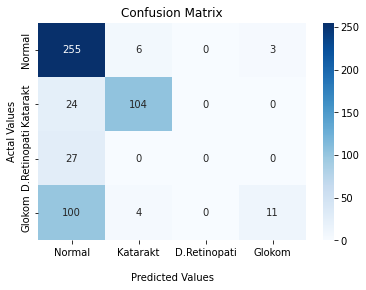

In [43]:
vgg16_1 = model_load("vgg16_1_224_224_3")
confusion_matrix_and_classification_report(vgg16_1)

### 2 - VGG16 -rmsprop

In [ ]:
vgg16_2 = vgg16()

vgg16_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_2_history = vgg16_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 12s 206ms/step - loss: 2.0403 - accuracy: 0.5310 - val_loss: 0.9526 - val_accuracy: 0.6300
Epoch 2/20
54/54 [==============================] - 11s 203ms/step - loss: 1.4340 - accuracy: 0.6048 - val_loss: 1.5700 - val_accuracy: 0.6464
Epoch 3/20
54/54 [==============================] - 11s 205ms/step - loss: 1.1608 - accuracy: 0.6563 - val_loss: 1.1234 - val_accuracy: 0.6534
Epoch 4/20
54/54 [==============================] - 11s 202ms/step - loss: 1.1689 - accuracy: 0.6645 - val_loss: 1.9525 - val_accuracy: 0.4941
Epoch 5/20
54/54 [==============================] - 11s 200ms/step - loss: 1.0987 - accuracy: 0.6639 - val_loss: 1.0371 - val_accuracy: 0.7096
Epoch 6/20
54/54 [==============================] - 11s 198ms/step - loss: 1.1004 - accuracy: 0.6768 - val_loss: 2.0395 - val_accuracy: 0.6698
Epoch 7/20
54/54 [==============================] - 11s 198ms/step - loss: 0.9050 - accuracy: 0.7313 - val_loss: 4.0426 - val_accuracy: 0.3091

In [ ]:
loss_13,accuracy_13 = vgg16_2.evaluate(X_test,y_test)

17/17 [==============================] - 3s 160ms/step - loss: 0.6732 - accuracy: 0.7921


In [ ]:
history_save("vgg16_2_history",vgg16_2_history)
model_save(vgg16_2,"vgg16_2_224_224_3")

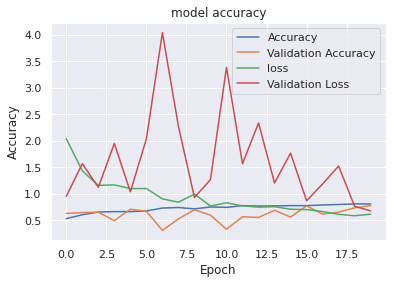

In [ ]:
history_summary(vgg16_2_history)

17/17 [==============================] - 3s 162ms/step
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       264
    Katarakt       0.00      0.00      0.00       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.49       534
   macro avg       0.12      0.25      0.17       534
weighted avg       0.24      0.49      0.33       534

[[264   0   0   0]
 [128   0   0   0]
 [ 27   0   0   0]
 [115   0   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


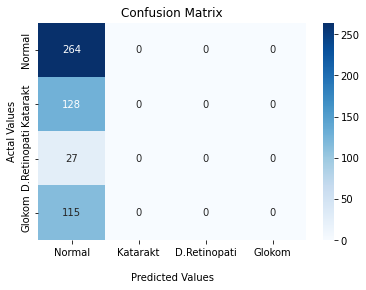

In [44]:
vgg16_2 = model_load("vgg16_2_224_224_3")
confusion_matrix_and_classification_report(vgg16_2)

### 3 - VGG16 -adam

In [53]:
vgg16_3 = vgg16()

vgg16_3.compile(optimizer= 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_3_history = vgg16_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 12s 212ms/step - loss: 1.1851 - accuracy: 0.6171 - val_loss: 0.8598 - val_accuracy: 0.6862
Epoch 2/20
54/54 [==============================] - 11s 212ms/step - loss: 0.6650 - accuracy: 0.7412 - val_loss: 0.6705 - val_accuracy: 0.7260
Epoch 3/20
54/54 [==============================] - 12s 220ms/step - loss: 0.5924 - accuracy: 0.7758 - val_loss: 0.6414 - val_accuracy: 0.7237
Epoch 4/20
54/54 [==============================] - 12s 214ms/step - loss: 0.5224 - accuracy: 0.7922 - val_loss: 0.6701 - val_accuracy: 0.7330
Epoch 5/20
54/54 [==============================] - 11s 208ms/step - loss: 0.4930 - accuracy: 0.8009 - val_loss: 0.6445 - val_accuracy: 0.7330
Epoch 6/20
54/54 [==============================] - 11s 206ms/step - loss: 0.4593 - accuracy: 0.8144 - val_loss: 0.6741 - val_accuracy: 0.7119
Epoch 7/20
54/54 [==============================] - 11s 206ms/step - loss: 0.3952 - accuracy: 0.8507 - val_loss: 0.6030 - val_accuracy: 0.7541

In [54]:
loss_14,accuracy_14 = vgg16_3.evaluate(X_test,y_test)

17/17 [==============================] - 3s 165ms/step - loss: 0.6077 - accuracy: 0.7697


In [55]:
history_save("vgg16_3_history",vgg16_3_history)
model_save(vgg16_3,"vgg16_3_224_224_3")

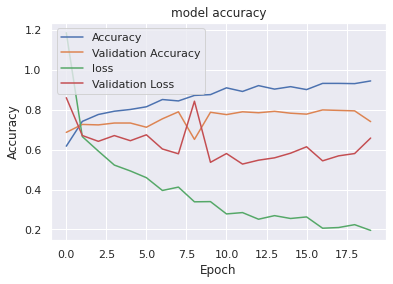

In [56]:
history_summary(vgg16_3_history)

17/17 [==============================] - 3s 167ms/step
              precision    recall  f1-score   support

      Normal       0.92      0.69      0.79       264
    Katarakt       0.91      0.91      0.91       128
D.Retinopati       0.48      0.56      0.52        27
      Glokom       0.55      0.84      0.66       115

    accuracy                           0.77       534
   macro avg       0.72      0.75      0.72       534
weighted avg       0.82      0.77      0.78       534

[[182   7   7  68]
 [  1 117   4   6]
 [  6   0  15   6]
 [  9   4   5  97]] 



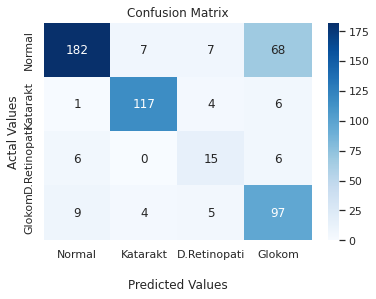

In [57]:
vgg16_3 = model_load("vgg16_3_224_224_3")
confusion_matrix_and_classification_report(vgg16_3)

### 4 - VGG16 -Adadelta

In [ ]:
vgg16_4 = vgg16()

vgg16_4.compile(optimizer= optimizers.Adadelta(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_4_history = vgg16_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 12s 207ms/step - loss: 1.5014 - accuracy: 0.2114 - val_loss: 1.4115 - val_accuracy: 0.2319
Epoch 2/20
54/54 [==============================] - 11s 203ms/step - loss: 1.3759 - accuracy: 0.2196 - val_loss: 1.3135 - val_accuracy: 0.2506
Epoch 3/20
54/54 [==============================] - 11s 204ms/step - loss: 1.2880 - accuracy: 0.3033 - val_loss: 1.2515 - val_accuracy: 0.3466
Epoch 4/20
54/54 [==============================] - 11s 202ms/step - loss: 1.2321 - accuracy: 0.4198 - val_loss: 1.2129 - val_accuracy: 0.4707
Epoch 5/20
54/54 [==============================] - 11s 201ms/step - loss: 1.1961 - accuracy: 0.4959 - val_loss: 1.1900 - val_accuracy: 0.4918
Epoch 6/20
54/54 [==============================] - 11s 198ms/step - loss: 1.1751 - accuracy: 0.5105 - val_loss: 1.1774 - val_accuracy: 0.4918
Epoch 7/20
54/54 [==============================] - 11s 197ms/step - loss: 1.1620 - accuracy: 0.5100 - val_loss: 1.1697 - val_accuracy: 0.4895

In [ ]:
loss_15,accuracy_15 = vgg16_4.evaluate(X_test,y_test)

17/17 [==============================] - 3s 155ms/step - loss: 1.0826 - accuracy: 0.4981


In [ ]:
history_save("vgg16_4_history",vgg16_4_history)
model_save(vgg16_4,"vgg16_4_224_224_3")

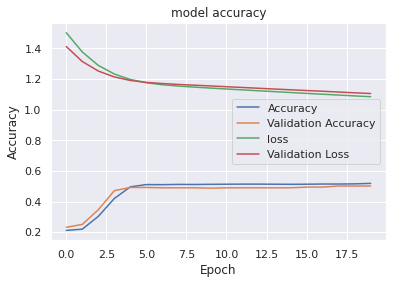

In [ ]:
history_summary(vgg16_4_history)

17/17 [==============================] - 3s 162ms/step
              precision    recall  f1-score   support

      Normal       0.50      1.00      0.66       264
    Katarakt       0.00      0.00      0.00       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.60      0.03      0.05       115

    accuracy                           0.50       534
   macro avg       0.27      0.26      0.18       534
weighted avg       0.38      0.50      0.34       534

[[263   0   0   1]
 [127   0   0   1]
 [ 27   0   0   0]
 [112   0   0   3]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


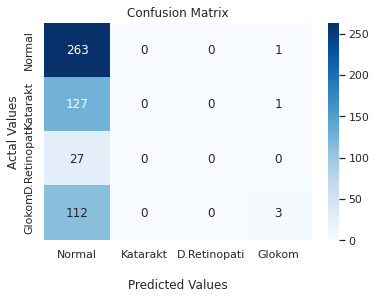

In [58]:
vgg16_4 = model_load("vgg16_4_224_224_3")
confusion_matrix_and_classification_report(vgg16_4)

### 5 - VGG16 - Adagrad

In [ ]:
vgg16_5 = vgg16()

vgg16_5.compile(optimizer= optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg16_5_history = vgg16_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 12s 216ms/step - loss: 1.0887 - accuracy: 0.5404 - val_loss: 1.0248 - val_accuracy: 0.5059
Epoch 2/20
54/54 [==============================] - 11s 203ms/step - loss: 0.9128 - accuracy: 0.6593 - val_loss: 0.9151 - val_accuracy: 0.6651
Epoch 3/20
54/54 [==============================] - 11s 205ms/step - loss: 0.8601 - accuracy: 0.6920 - val_loss: 0.9057 - val_accuracy: 0.6674
Epoch 4/20
54/54 [==============================] - 11s 202ms/step - loss: 0.8224 - accuracy: 0.7026 - val_loss: 0.9090 - val_accuracy: 0.6557
Epoch 5/20
54/54 [==============================] - 11s 201ms/step - loss: 0.7951 - accuracy: 0.7061 - val_loss: 0.8334 - val_accuracy: 0.7026
Epoch 6/20
54/54 [==============================] - 11s 198ms/step - loss: 0.7750 - accuracy: 0.7073 - val_loss: 0.8375 - val_accuracy: 0.6932
Epoch 7/20
54/54 [==============================] - 11s 198ms/step - loss: 0.7561 - accuracy: 0.7207 - val_loss: 0.8263 - val_accuracy: 0.6932

In [ ]:
loss_16,accuracy_16 = vgg16_5.evaluate(X_test,y_test)

17/17 [==============================] - 3s 156ms/step - loss: 0.6953 - accuracy: 0.7322


In [ ]:
history_save("vgg16_5_history",vgg16_5_history)
model_save(vgg16_5,"vgg16_5_224_224_3")

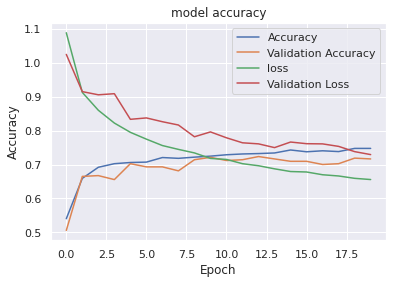

In [ ]:
history_summary(vgg16_5_history)

17/17 [==============================] - 3s 161ms/step
              precision    recall  f1-score   support

      Normal       0.73      0.84      0.78       264
    Katarakt       0.77      0.97      0.86       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.66      0.40      0.50       115

    accuracy                           0.73       534
   macro avg       0.54      0.55      0.53       534
weighted avg       0.69      0.73      0.70       534

[[221  21   0  22]
 [  3 124   0   1]
 [ 24   2   0   1]
 [ 54  15   0  46]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


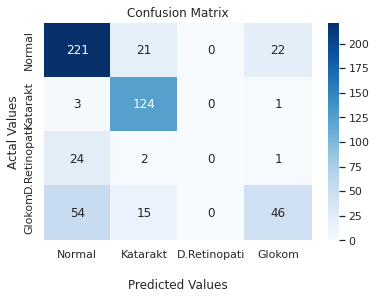

In [59]:
vgg16_5 = model_load("vgg16_5_224_224_3")
confusion_matrix_and_classification_report(vgg16_5)

## VGG19 modelinin farkl parametrelerle eğitilmesi

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
def vgg19():
  vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))
  for layer in vgg.layers:
    layer.trainable = False

  model = Sequential()
  model.add(vgg)
  model.add(Flatten())
  model.add(Dense(class_size,activation="sigmoid"))

  return model

### 1 - VGG19 - SGD

In [ ]:
vgg19_1 = vgg19()

vgg19_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr=0.001,momentum=0.7), metrics=['accuracy'])

vgg19_1_history = vgg19_1.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
54/54 [==============================] - 14s 246ms/step - loss: 1.3217 - accuracy: 0.5018 - val_loss: 0.9412 - val_accuracy: 0.6440
Epoch 2/20
54/54 [==============================] - 13s 245ms/step - loss: 1.1359 - accuracy: 0.5632 - val_loss: 1.1473 - val_accuracy: 0.5222
Epoch 3/20
54/54 [==============================] - 13s 239ms/step - loss: 1.1141 - accuracy: 0.5925 - val_loss: 1.1814 - val_accuracy: 0.4754
Epoch 4/20
54/54 [==============================] - 13s 235ms/step - loss: 0.9730 - accuracy: 0.6194 - val_loss: 1.1866 - val_accuracy: 0.4590
Epoch 5/20
54/54 [==============================] - 13s 234ms/step - loss: 0.9558 - accuracy: 0.6311 - val_loss: 1.5444 - val_accuracy: 0.3489
Epoch 6/20
54/54 [==============================] - 13s 232ms/step - loss: 0.9977 - accuracy: 0.6177 - val_loss: 0.8456 - val_accuracy: 0.6464
Epoch 7/20
54/54 [==============================] - 13s 234ms/step - loss: 0.8564 - accuracy: 0.6686 - val_loss: 0.8815 - val_accuracy: 0.6534

In [ ]:
loss_13,accuracy_13 = vgg19_1.evaluate(X_test,y_test)

17/17 [==============================] - 3s 189ms/step - loss: 0.7700 - accuracy: 0.7097


In [ ]:
history_save("vgg19_1_history",vgg19_1_history)
model_save(vgg19_1,"vgg19_1_224_224_3")

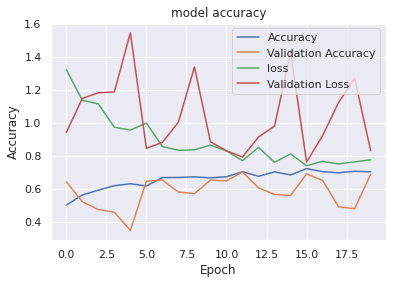

In [ ]:
history_summary(vgg19_1_history)

17/17 [==============================] - 3s 191ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.71      0.83      0.77       264
    Katarakt       0.71      0.98      0.83       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.69      0.30      0.41       115

    accuracy                           0.71       534
   macro avg       0.53      0.53      0.50       534
weighted avg       0.67      0.71      0.67       534

[[220  30   0  14]
 [  3 125   0   0]
 [ 24   2   0   1]
 [ 63  18   0  34]] 



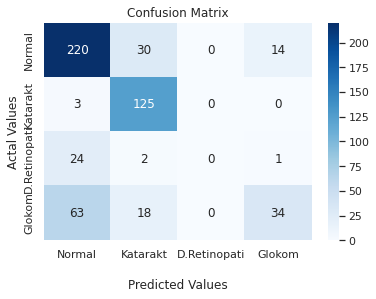

In [60]:
vgg19_1 = model_load("vgg19_1_224_224_3")
confusion_matrix_and_classification_report(vgg19_1)

### 2 - VGG19 - rmsprop

In [ ]:
vgg19_2 = vgg19()

vgg19_2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_2_history = vgg19_2.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 14s 240ms/step - loss: 2.5455 - accuracy: 0.4900 - val_loss: 2.2942 - val_accuracy: 0.6112
Epoch 2/20
54/54 [==============================] - 13s 244ms/step - loss: 1.8539 - accuracy: 0.5638 - val_loss: 1.4015 - val_accuracy: 0.6487
Epoch 3/20
54/54 [==============================] - 13s 244ms/step - loss: 1.6107 - accuracy: 0.6077 - val_loss: 1.3315 - val_accuracy: 0.6159
Epoch 4/20
54/54 [==============================] - 13s 236ms/step - loss: 1.5577 - accuracy: 0.6235 - val_loss: 1.5225 - val_accuracy: 0.5808
Epoch 5/20
54/54 [==============================] - 12s 232ms/step - loss: 1.4934 - accuracy: 0.6364 - val_loss: 3.8694 - val_accuracy: 0.4895
Epoch 6/20
54/54 [==============================] - 12s 231ms/step - loss: 1.3287 - accuracy: 0.6680 - val_loss: 2.4368 - val_accuracy: 0.4286
Epoch 7/20
54/54 [==============================] - 13s 233ms/step - loss: 1.4129 - accuracy: 0.6552 - val_loss: 2.2985 - val_accuracy: 0.5878

In [ ]:
loss_14,accuracy_14 = vgg19_2.evaluate(X_test,y_test)

17/17 [==============================] - 3s 188ms/step - loss: 1.9615 - accuracy: 0.6835


In [ ]:
history_save("vgg19_2_history",vgg19_2_history)
model_save(vgg19_2,"vgg19_2_224_224_3")

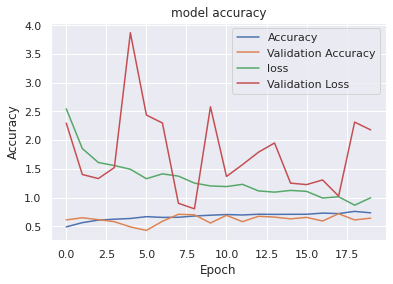

In [ ]:
history_summary(vgg19_2_history)

17/17 [==============================] - 3s 194ms/step
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       264
    Katarakt       0.00      0.00      0.00       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.00      0.00      0.00       115

    accuracy                           0.49       534
   macro avg       0.12      0.25      0.17       534
weighted avg       0.24      0.49      0.33       534

[[264   0   0   0]
 [128   0   0   0]
 [ 27   0   0   0]
 [115   0   0   0]] 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


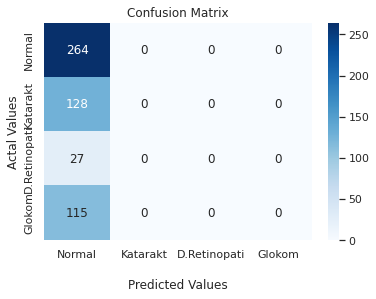

In [61]:
vgg19_2 = model_load("vgg19_2_224_224_3")
confusion_matrix_and_classification_report(vgg19_2)

### 3 - VGG19 - adam 

In [ ]:
vgg19_3 = vgg19()

vgg19_3.compile(optimizer= 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_3_history = vgg19_3.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 14s 246ms/step - loss: 1.1138 - accuracy: 0.6136 - val_loss: 1.1023 - val_accuracy: 0.6019
Epoch 2/20
54/54 [==============================] - 13s 246ms/step - loss: 0.8439 - accuracy: 0.6786 - val_loss: 0.8466 - val_accuracy: 0.6745
Epoch 3/20
54/54 [==============================] - 13s 241ms/step - loss: 0.6595 - accuracy: 0.7436 - val_loss: 0.8323 - val_accuracy: 0.6557
Epoch 4/20
54/54 [==============================] - 13s 234ms/step - loss: 0.6048 - accuracy: 0.7617 - val_loss: 0.7009 - val_accuracy: 0.7073
Epoch 5/20
54/54 [==============================] - 12s 232ms/step - loss: 0.6291 - accuracy: 0.7582 - val_loss: 0.7355 - val_accuracy: 0.7002
Epoch 6/20
54/54 [==============================] - 12s 231ms/step - loss: 0.5838 - accuracy: 0.7693 - val_loss: 0.7421 - val_accuracy: 0.6956
Epoch 7/20
54/54 [==============================] - 12s 232ms/step - loss: 0.5366 - accuracy: 0.7886 - val_loss: 0.8956 - val_accuracy: 0.6206

In [ ]:
loss_15,accuracy_15 = vgg19_3.evaluate(X_test,y_test)

17/17 [==============================] - 3s 188ms/step - loss: 0.7427 - accuracy: 0.7097


In [ ]:
history_save("vgg19_3_history",vgg19_3_history)
model_save(vgg19_3,"vgg19_3_224_224_3")

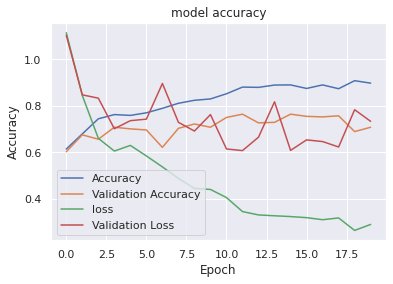

In [ ]:
history_summary(vgg19_3_history)

17/17 [==============================] - 3s 196ms/step
              precision    recall  f1-score   support

      Normal       0.84      0.70      0.76       264
    Katarakt       0.75      0.97      0.85       128
D.Retinopati       0.22      0.63      0.32        27
      Glokom       0.74      0.47      0.57       115

    accuracy                           0.71       534
   macro avg       0.64      0.69      0.63       534
weighted avg       0.77      0.71      0.72       534

[[184  27  34  19]
 [  2 124   2   0]
 [  8   2  17   0]
 [ 24  12  25  54]] 



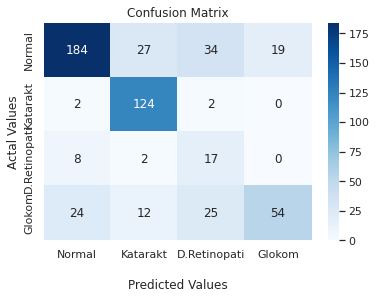

In [62]:
vgg19_3 = model_load("vgg19_3_224_224_3")
confusion_matrix_and_classification_report(vgg19_3)

### 4 - VGG19 - ADADELTA

In [ ]:
vgg19_4 = vgg19()

vgg19_4.compile(optimizer= optimizers.Adadelta(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_4_history = vgg19_4.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

80150528/80134624 [==============================] - 0s 0us/step
Epoch 1/20
54/54 [==============================] - 27s 270ms/step - loss: 1.3262 - accuracy: 0.5088 - val_loss: 1.3150 - val_accuracy: 0.4848
Epoch 2/20
54/54 [==============================] - 12s 217ms/step - loss: 1.2485 - accuracy: 0.5088 - val_loss: 1.2464 - val_accuracy: 0.4848
Epoch 3/20
54/54 [==============================] - 12s 220ms/step - loss: 1.1990 - accuracy: 0.5088 - val_loss: 1.2021 - val_accuracy: 0.4848
Epoch 4/20
54/54 [==============================] - 12s 227ms/step - loss: 1.1680 - accuracy: 0.5088 - val_loss: 1.1753 - val_accuracy: 0.4871
Epoch 5/20
54/54 [==============================] - 12s 228ms/step - loss: 1.1491 - accuracy: 0.5094 - val_loss: 1.1593 - val_accuracy: 0.4871
Epoch 6/20
54/54 [==============================] - 12s 232ms/step - loss: 1.1370 - accuracy: 0.5082 - val_loss: 1.1478 - val_accuracy: 0.4871
Epoch 7/20
54/54 [==============================] - 13s 234ms/step - loss: 1.

In [ ]:
loss_16,accuracy_16 = vgg19_4.evaluate(X_test,y_test)

17/17 [==============================] - 6s 338ms/step - loss: 1.0472 - accuracy: 0.4981


In [ ]:
history_save("vgg19_4_history",vgg19_4_history)
model_save(vgg19_4,"vgg19_4_224_224_3")

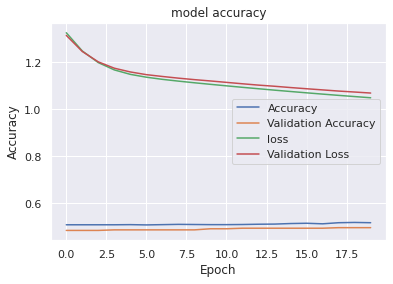

In [ ]:
history_summary(vgg19_4_history)

17/17 [==============================] - 4s 220ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.50      0.99      0.66       264
    Katarakt       1.00      0.02      0.03       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.33      0.03      0.05       115

    accuracy                           0.50       534
   macro avg       0.46      0.26      0.19       534
weighted avg       0.56      0.50      0.35       534

[[261   0   0   3]
 [124   2   0   2]
 [ 26   0   0   1]
 [112   0   0   3]] 



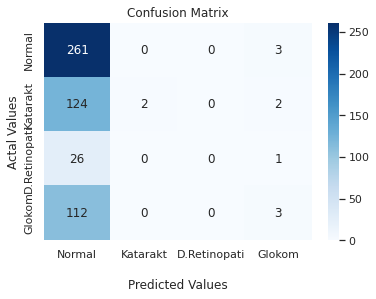

In [63]:
vgg19_4 = model_load("vgg19_4_224_224_3")
confusion_matrix_and_classification_report(vgg19_4)

### 5 - VGG19 - Adagrad

In [ ]:
vgg19_5 = vgg19()

vgg19_5.compile(optimizer= optimizers.Adagrad(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

vgg19_5_history = vgg19_5.fit(X_train_oversampling, y_train_oversampling,
                                  batch_size= 32,
                                  epochs= 20,
                                  validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 15s 258ms/step - loss: 1.1440 - accuracy: 0.5340 - val_loss: 1.0959 - val_accuracy: 0.4941
Epoch 2/20
54/54 [==============================] - 14s 263ms/step - loss: 0.9227 - accuracy: 0.6464 - val_loss: 0.9375 - val_accuracy: 0.6300
Epoch 3/20
54/54 [==============================] - 14s 257ms/step - loss: 0.8700 - accuracy: 0.6622 - val_loss: 0.8987 - val_accuracy: 0.6511
Epoch 4/20
54/54 [==============================] - 13s 250ms/step - loss: 0.8373 - accuracy: 0.6797 - val_loss: 0.8964 - val_accuracy: 0.6487
Epoch 5/20
54/54 [==============================] - 13s 245ms/step - loss: 0.8134 - accuracy: 0.6809 - val_loss: 0.8780 - val_accuracy: 0.6487
Epoch 6/20
54/54 [==============================] - 13s 244ms/step - loss: 0.7970 - accuracy: 0.6979 - val_loss: 0.8924 - val_accuracy: 0.6347
Epoch 7/20
54/54 [==============================] - 13s 248ms/step - loss: 0.7794 - accuracy: 0.6944 - val_loss: 0.8291 - val_accuracy: 0.6862

In [ ]:
loss_17,accuracy_17 = vgg19_5.evaluate(X_test,y_test)

17/17 [==============================] - 3s 199ms/step - loss: 0.7434 - accuracy: 0.7022


In [ ]:
history_save("vgg19_5_history",vgg19_5_history)
model_save(vgg19_5,"vgg19_5_224_224_3")

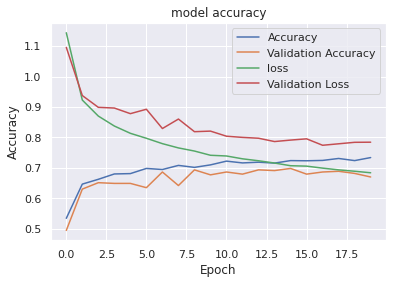

In [ ]:
history_summary(vgg19_5_history)

17/17 [==============================] - 4s 220ms/step
              precision    recall  f1-score   support

      Normal       0.75      0.74      0.74       264
    Katarakt       0.74      0.98      0.84       128
D.Retinopati       0.00      0.00      0.00        27
      Glokom       0.55      0.48      0.51       115

    accuracy                           0.70       534
   macro avg       0.51      0.55      0.52       534
weighted avg       0.67      0.70      0.68       534

[[195  28   0  41]
 [  2 125   0   1]
 [ 24   0   0   3]
 [ 40  15   5  55]] 



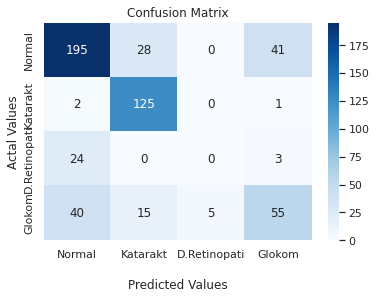

In [64]:
vgg19_5 = model_load("vgg19_5_224_224_3")
confusion_matrix_and_classification_report(vgg19_5)

# Modellerin Karşılaştırılması

In [ ]:
def degerlendirme(model,X,y):
  return model.evaluate(X,y)

In [ ]:
alexnet_1 = model_load("alexnet_1_224_224_3") # SGD
alexnet_6 = model_load("alexnet_6_224_224_3") # Adagrad
alexnet_2 = model_load("alexnet_2_224_224_3") # RMSprop
alexnet_5 = model_load("alexnet_5_224_224_3") #Adadelta
alexnet_3 = model_load("alexnet_3_224_224_3") # Adam

resnet_1 = model_load("resnet_1_224_224_3") # SGD
resnet_5 = model_load("resnet_5_224_224_3") # Adagrad
resnet_2 = model_load("resnet_2_224_224_3") # RMSprop
resnet_4 = model_load("resnet_4_224_224_3") # Adadelta
resnet_3 = model_load("resnet_3_224_224_3") # Adam


In [ ]:
# Test verisi için doğruluk yuzdesi hesaplama

alexnet_eva_1 = round(degerlendirme(alexnet_1,X_test,y_test)[1],4)
alexnet_eva_6 = round(degerlendirme(alexnet_6,X_test,y_test)[1],4)
alexnet_eva_2 = round(degerlendirme(alexnet_2,X_test,y_test)[1],4)
alexnet_eva_5 = round(degerlendirme(alexnet_5,X_test,y_test)[1],4)
alexnet_eva_3 = round(degerlendirme(alexnet_3,X_test,y_test)[1],4)


32/32 [==============================] - 1s 29ms/step - loss: 0.9092 - accuracy: 0.6038


In [ ]:
resnet_eva_1 = round(degerlendirme(resnet_1,X_test,y_test)[1],4)
resnet_eva_5 = round(degerlendirme(resnet_5,X_test,y_test)[1],4)
resnet_eva_2 = round(degerlendirme(resnet_2,X_test,y_test)[1],4)
resnet_eva_4 = round(degerlendirme(resnet_4,X_test,y_test)[1],4)
resnet_eva_3 = round(degerlendirme(resnet_3,X_test,y_test)[1],4)

32/32 [==============================] - 8s 202ms/step - loss: 0.9418 - accuracy: 0.6077


In [ ]:
data = [[alexnet_eva_1,alexnet_eva_6,alexnet_eva_2,alexnet_eva_5,alexnet_eva_3],
                [resnet_eva_1,resnet_eva_5,resnet_eva_2,resnet_eva_4,resnet_eva_3]]
                
data

[[0.5988, 0.6146, 0.6057, 0.5949, 0.6038],
 [0.6028, 0.5998, 0.3715, 0.6008, 0.6077]]

In [ ]:
columns =  ['SGD', 'Adagrad', 'RMSprop','Adadelta','Adam']

print("Test verisi için acc değerlerinin model özeti\n")
sonuc = pd.DataFrame(data=data, index = ['AlexNet','ResNet50'], columns = columns)
sonuc

Test verisi için acc değerlerinin model özeti



,SGD,Adagrad,RMSprop,Adadelta,Adam
AlexNet,0.5988,0.6146,0.6057,0.5949,0.6038
ResNet50,0.6028,0.5998,0.3715,0.6008,0.6077
